## 4.4 CNN

### 합성곱 신경망
* Convolution Neural Network
* 합성곱 신경망
* 이미지 인식에 탁월한 효과
* 3가지 Layer
    * Convolution Layer
        * Feature 추출
        * ReLu 
    * Pooling Layer
        * Feature 중 중요한 것만 선택
    * Fully-Connected Layer
        * 최종 Feature들로 학습 및 예측
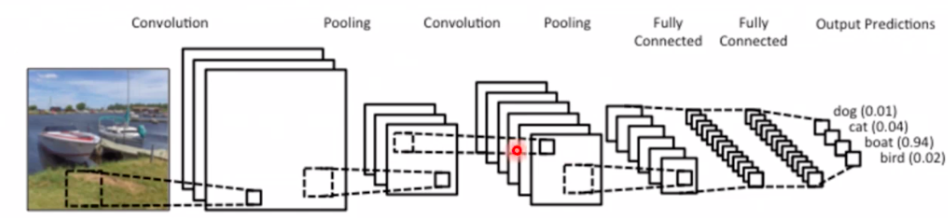


### 합성곱 연산
* 완전연결층은 입력값 모두에서 패턴을 찾기 때문에 입력값 모두가 변수고 가중치이다.
* Conv는 윈도우 크기(3x3)으로 나눠서 지역 패턴을 찾는다.
    * 학습된 패턴은 평행 이동 불편성을 갖는다
        * 고양이 눈이 화면 어디에 있든 중요하지 않다
        * 그냥 고양이 눈이다.
        * 만약 완전연결층이면 고양이 눈은 항상 거기 있어야 한다.
    * 패턴의 공간적 계층 구조를 학습할 수 있다
        * 단계를 여러번 두면 선이 면이 되고 면이 도형이 되서 점점 더 구체화
* Conv 층은 입력과 출력으로 특성맵(feature map)이라는 것을 사용
    * 3D 텐서 형식, (w, h, filter)
    * 최초 ConvD는 (w,h,c)인데 그 다음 부터는 필터를 지정한 대로 생성
    * 커널(윈도우)은 keras의 Conv2D(depth, (h, w))로 생성
        * (h, w)로 출력 크기가 결정, summary()로 확인

### 최대 풀링연산(MaxPool)
* 특성맵을 다운 샘플링하는 역할, 작게 만든다
    * 2x2크기의 윈도우로 걸쳐서 그 안에 있는 값 중 중 최대 값만 취한다.
    * 스트라이드는 보통 2
* 이걸 안하면?
    * 최종 층의 윈도우 영역은 최초 입력의 특정 영역에 대한 것만 반영
    * 파라미터가 너무 많아서 무조건 과대 적합
    * 어쨌든 크기를 줄이는게 목표
* 최대 풀링말고 평균값을 구하는 평균 풀링도 있다
    * 경험적 결과로 최대 풀링이 우수
    

* Demo : https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html

### Convolution 연산과 필터
* 커널의 각 요소와 대응하는 입력 픽셀 값을 곱해서 모두 합한것
* kernel : 연산에 활용할 주변 픽셀 대상 선정
    * window, mask, filter 등의 이름으로 혼용
    * 커널 크기 : n x n
* 컨볼루션 연산으로 블러링, 샤프닝 등의 필터 적용
* CNN의 목표는 적절한 커널 학습
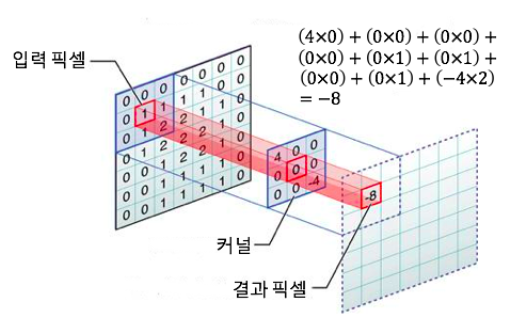

#### OpenCV를 이용한 Convolution 연산
* 평균 블러 필터

(444, 400, 3)


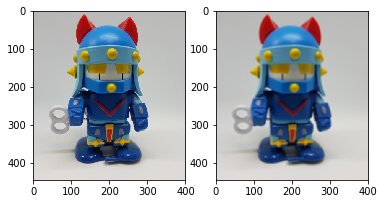

In [2]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('./img/tkv.jpg')
print(img.shape)
'''
#5x5 평균 필터 커널 생성    ---①
kernel = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
'''
# 5x5 평균 필터 커널 생성  ---②
kernel = np.ones((5,5))/5**2
# 필터 적용             ---③
blured = cv2.filter2D(img, -1, kernel)

# 결과 출력

plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


#### 엣지 검출 필터

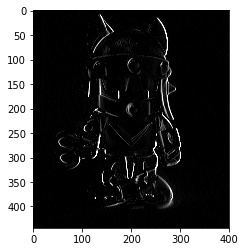

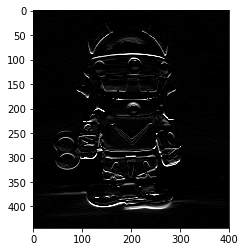

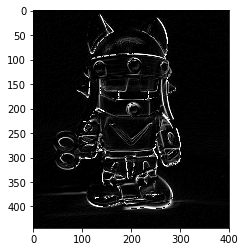

In [3]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('./img/tkv.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 소벨 커널을 직접 생성해서 엣지 검출 ---①
## 소벨 커널 생성
gx_k = np.array([[-1,0,1],
                 [-2,0,2],
                 [-1,0,1]])

gy_k = np.array([[-1,-2,-1],
                 [0,0,0],
                 [1,2,1]])
## 소벨 필터 적용
edge_gx = cv2.filter2D(img, -1, gx_k)
edge_gy = cv2.filter2D(img, -1, gy_k)


# 결과 출력
plt.imshow(edge_gx, cmap='gray')
plt.show()
plt.imshow(edge_gy, cmap='gray')
plt.show()
plt.imshow(edge_gx + edge_gy, cmap='gray')
plt.show()

### 사물인식을 위한 8층 CNN
* Conv1 : convolution 계층에서 추출되는 정보, Edge와 Blob
* Conv3 : Texture -> Conv5 : 사물의 일부 -> FC: 사물의 클래스
* 깊은 Convolution Layer 
    * 복잡하고 추상화된 정보 추출
    * 뉴런이 반응하는 대상이 단순한 모양에서 고급 정보로 변화

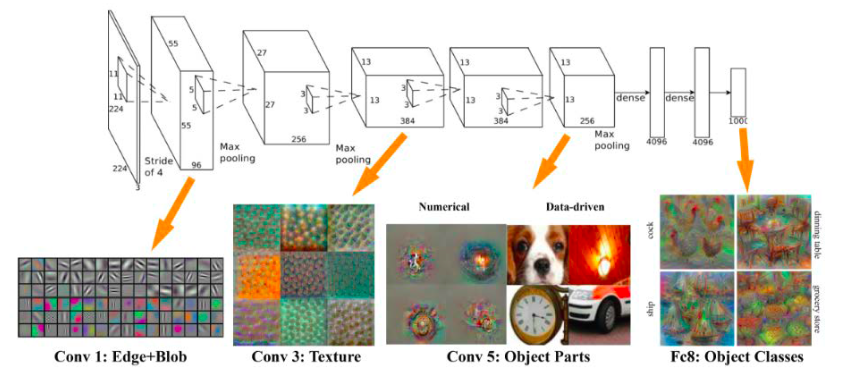

### 특징 추출
<video controls="controls" src="./assets/Top_breeder.mp4" width=640 height=480></video>
* 출처 : https://www.youtube.com/watch?v=f1fXCRtSUWU

### 특징 추출2
<video controls="controls" src="./assets/Avatar.mp4" width=640 height=480></video>
* 출처 :https://www.youtube.com/watch?v=U1KiC0AXhHg

#### TF Convolution
* `tf.nn.conv2d(input,filter=None,strides=None,padding=None,...)`
    * input : `[batch, height, width, channel]`
    * filter : `[height, width, in_channel, out_channel]`
    * strides : 이동 간격, shape={1,2,4}, `[N, H, W, C]`
    * padding : `{"SMAE":출력이 입력의 크기와 같다, "VALID"}`


[[0 1 2]
 [3 4 5]
 [6 7 8]]


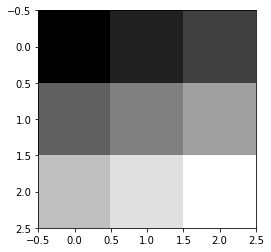

In [43]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

img = np.arange(9).reshape(3,3)
print(img)
plt.imshow(img, cmap='gray')

(1, 3, 3, 1)
[[[[1.]]

  [[1.]]]


 [[[1.]]

  [[1.]]]]
[[ 8. 12.]
 [20. 24.]]


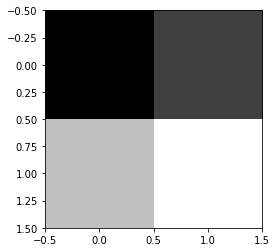

In [44]:
x = np.float32(img.reshape(1,3,3,1))
print(x.shape)
filter = np.ones((2,2,1,1), dtype=np.float32) # 2x2 window, 1:in, 1:out
print(filter)
filter = tf.constant(filter)
stride = [1,1,1,1]
conv2d = tf.nn.conv2d(x, filter, stride, padding='VALID')#SAME

with tf.Session() as sess:
    conv2d_out = sess.run(conv2d)
out = conv2d_out.reshape(2,2)
print(out)
plt.imshow(out, cmap='gray')

### Conv2d를 이용한 평균 블러링

(1, 444, 400, 1)


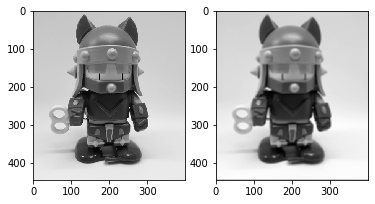

In [48]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('./img/tkv.jpg', cv2.IMREAD_GRAYSCALE)

(h,w) = img.shape
x = img.reshape(1,h,w,1).astype(np.float32)

win_size = 5
filter = np.array([[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]])
filter = filter.reshape(5,5,1,1)
filter = np.ones((win_size,win_size,1,1))/win_size**2

conv2d = tf.nn.conv2d(x, filter, [1,1,1,1], padding='SAME')
with tf.Session() as sess:
    blured = sess.run(conv2d)
print(blured.shape)
blured = blured.reshape(h,w).astype(np.uint8)
# 결과 출력
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(blured, cmap='gray')


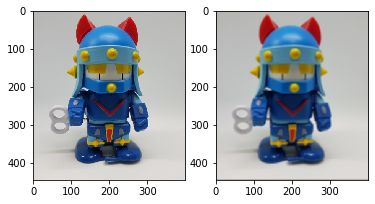

In [50]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('./img/tkv.jpg')

(h,w,c) = img.shape
x = img.reshape(1,h,w,c).astype(np.float32)

win_size = 5
filter = np.zeros((win_size,win_size,c,c), dtype=np.float32)
filter[:,:] = np.eye(3) * (1/(win_size**2))

conv2d = tf.nn.conv2d(x, filter, [1,1,1,1], padding='SAME')

with tf.Session() as sess:
    blured = sess.run(conv2d)

#blured = blured.reshape(h,w,c).astype(np.uint8)
blured = np.squeeze(blured).astype(np.uint8)
# 결과 출력
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(blured[:,:,::-1])


#### TF Max Pool
* `tf.nn.max_pool(value, ksize, strides, padding...)`
    * value : input
    * ksize : window size, shape={1,2,4}, `[N, H, W, C]`
    * strides : 이동 간격, shape={1,2,4}, `[N, H, W, C]`
    * padding: `{"VALID", "SAME"}`

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


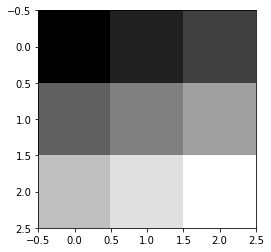

In [45]:
img = np.arange(9, dtype=np.float32).reshape(3,3)
print(img)
plt.imshow(img, cmap='gray')

[[[[4.]
   [5.]]

  [[7.]
   [8.]]]]


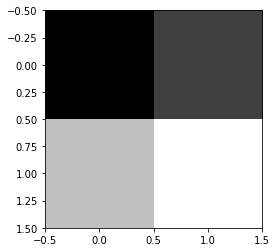

In [46]:
x = img.reshape(1,3,3,1)
pool = tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
with tf.Session() as sess:
    pooled = sess.run(pool)
print(pooled)
plt.imshow(pooled.reshape(2,2), cmap='gray')

#### MaxPool을 이용한 Feture 축소

(1, 444, 400, 1)
(1, 44, 40, 1)


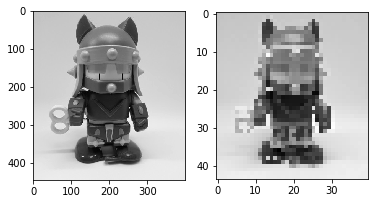

In [54]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
import cv2

img = cv2.imread('./img/tkv.jpg', cv2.IMREAD_GRAYSCALE)
(h,w) = img.shape[:2]

x = np.float32(img.reshape(1,h,w,1))
print(x.shape)

pool = tf.nn.max_pool(x, ksize=[1,5,5,1], strides=[1,10,10,1], padding='VALID')
with tf.Session() as sess:
    pooled = sess.run(pool)
print(pooled.shape)
pooled = pooled.squeeze()

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(pooled, cmap='gray')

# MNIST 예제

In [55]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([7 * 7 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 7 * 7 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L3, W4)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(15):
    total_cost = 0

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)

        _, cost_val = sess.run([optimizer, cost],
                               feed_dict={X: batch_xs,
                                          Y: batch_ys,
                                          keep_prob: 0.7})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1),
          'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))

print('최적화 완료!')

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:', sess.run(accuracy,
                        feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                   Y: mnist.test.labels,
                                   keep_prob: 1}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch: 0001 Avg. cost = 0.355
Epoch: 0002 Avg. cost = 0.110
Epoch: 0003 Avg. cost = 0.077
Epoch: 0004 Avg. cost = 0.062
Epoch: 0005 Avg. cost = 0.050
Epoch: 0006 Avg. cost = 0.04

## 잘 알려진 CNNs
* LeNet
* AlexNet
* GoogLeNet(Inception V1)
* SqueezNet
* VGGNet(VGG16 & VGG19)
* ResNet50
* Inception V3
* Xception
* MobileNet

#### Neural Network Visualization
* TensorSpace
    * https://tensorspace.org/index.html

### LeNet-5
* LeCun (얀 르쿤) 1998
* 가장 오래되고 널리 알려진 CNN 구조
* 손글씨 숫자 인식
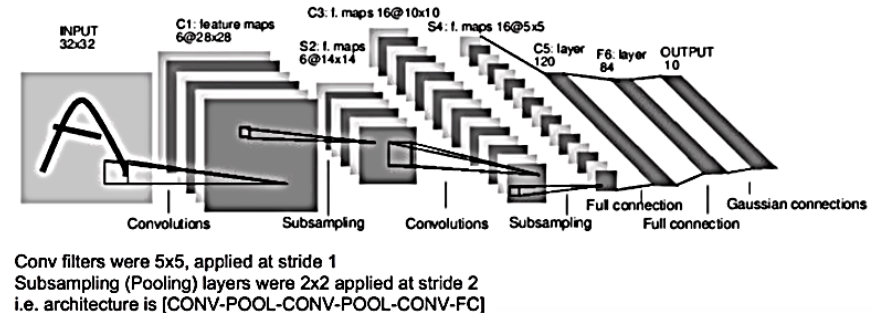


### LeNet-5 구성
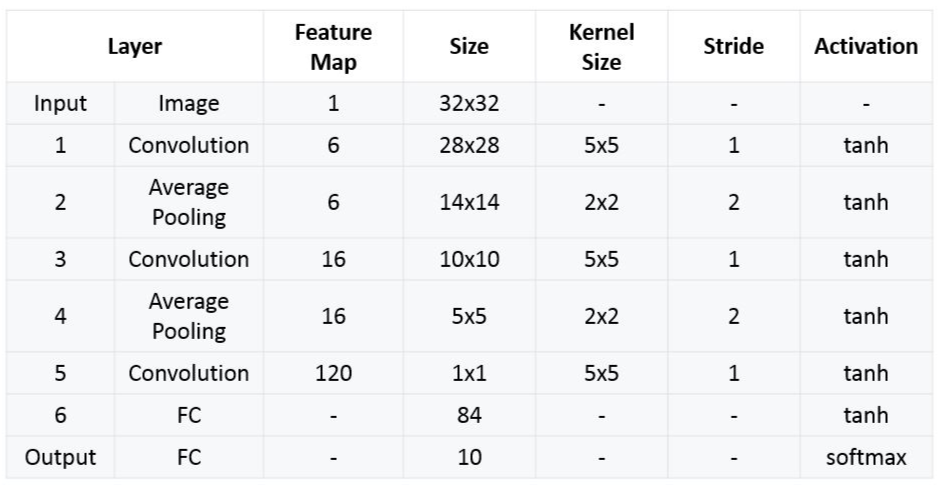

### LeNet CNN Example

#### Hot dog VS Not hot dog
* https://www.youtube.com/watch?v=pqTntG1RXSY

#### 1. Collect Image Set - Hot dog
1. Open the Chrome and visit Google
2. Search "hog dog"
3. Scroll down until no hot dog image comes out
4. open developer console
5. add jQuery
```javascript
var script = document.createElement('script');
script.src = "https://ajax.googleapis.com/ajax/libs/jquery/2.2.0/jquery.min.js";
document.getElementsByTagName('head')[0].appendChild(script);
```
6. Grap the URLs
```javascript
var urls = $('.rg_di .rg_meta').map(function() { return JSON.parse($(this).text()).ou; });
```

7. Download the URLs as a file
```javascript
var textToSave = urls.toArray().join('\n');
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
hiddenElement.target = '_blank';
hiddenElement.download = 'urls.txt';
hiddenElement.click();
```

##### Python으로 이미지 다운로드

In [4]:
!pip install requests

In [ ]:
import requests
import cv2
import os

img_path = './img/hotdog/'
file = open('./urls.txt')
urls = file.read()
urls = urls.strip().split('\n')
tot = 0

# loop the URLs
for url in urls:
    try:
        print(url)
        # try to download the image
        r = requests.get(url, timeout=60)

        # save the image to disk
        p = os.path.sep.join([img_path, "{}.jpg".format(
            str(tot).zfill(8))])
        f = open(p, "wb")
        f.write(r.content)
        f.close()

        # update the counter
        print("[INFO] downloaded: {}".format(p))
        tot += 1

        # handle if any exceptions are thrown during the download process
    except Exception as e:
        print("[INFO] error downloading {}...skipping".format(e))

##### 이미지 로딩 체크
로딩할 수 없는 이미지는 지운다.

In [ ]:
import glob

paths = glob.glob(img_path + "/*.*")

# loop over the image paths we just downloaded
for imagePath in paths:
    # initialize if the image should be deleted or not
    delete = False

    # try to load the image
    try:
        image = cv2.imread(imagePath)

        # if the image is `None` then we could not properly load it
        # from disk, so delete it
        if image is None:
            delete = True

    # if OpenCV cannot load the image then the image is likely
    # corrupt so we should delete it
    except:
        print("Except")
        delete = True

    # check to see if the image should be deleted
    if delete:
        print("[INFO] deleting {}".format(imagePath))
        os.remove(imagePath)

### 2. Trainging

#### LeNet Class

In [2]:
# import the necessary packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Dense
from keras import backend as K

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)

		# if we are using "channels first", update the input shape
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)

		# first set of CONV => RELU => POOL layers
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [3]:
%matplotlib inline

import matplotlib
matplotlib.use("Agg")

# import the necessary packages
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
# initialize the number of epochs to train for, initia learning rate,
# and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32

# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

model_path = "./hotdog_not_hotdog.model"
dataset_path = './img/'
paths = glob.glob(dataset_path + "/**/*.*")
#print(paths)
# grab the image paths and randomly shuffle them
imagePaths = sorted(paths)
random.seed(42)
random.shuffle(imagePaths)

# loop over the input images
for imagePath in imagePaths:
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.resize(image, (28, 28))
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	label = 1 if label == "hotdog" else 0
	labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")

# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
hist = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)

# save the model to disk
print("[INFO] serializing network...")
model.save(model_path)

# plot the training loss and accuracy
N = EPOCHS
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Santa/Not Santa")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

[INFO] loading images...
[INFO] compiling model...
Instructions for updating:
Colocations handled automatically by placer.
[INFO] training network...
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
21/21 [==============================] - 3s 161ms/step - loss: 0.6109 - acc: 0.6324 - val_loss: 0.5969 - val_acc: 0.6724
Epoch 2/25
21/21 [==============================] - 0s 10ms/step - loss: 0.4844 - acc: 0.7445 - val_loss: 0.4846 - val_acc: 0.7069
Epoch 3/25
21/21 [==============================] - 0s 14ms/step - loss: 0.4062 - acc: 0.7987 - val_loss: 0.3925 - val_acc: 0.8060
Epoch 4/25
21/21 [==============================] - 0s 14ms/step - loss: 0.3566 - acc: 0.8370 - val_loss: 0.3942 - val_acc: 0.7974
Epoch 5/25
21/21 [==============================] - 0s 14ms/step - loss: 0.3054 - acc: 0.8728 - val_loss: 0.7591 - val_acc: 0.6897
Epoch 6/25
21/21 [==============================] - 0s 14ms/step - loss: 0.3454 - acc: 0.8632 - val_loss: 0.2894 - val_acc: 0.8836
Epoch 7/25
21/2

c:\python36\lib\site-packages\ipykernel_launcher.py:98: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [ ]:
!pip install opencv-contrib-python

##### Test

In [7]:
!pip install imutils

['./examples\\bicycle.jpg', './examples\\car.jpg', './examples\\hotdog1.jpg', './examples\\hotdog2.jpg', './examples\\manhattan.png', './examples\\night_sky.png', './examples\\shue.jpg']
[INFO] loading network...


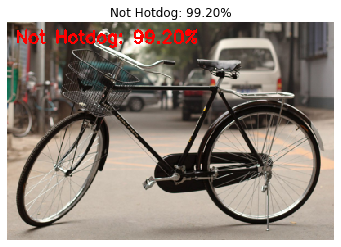

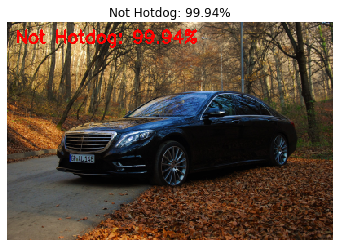

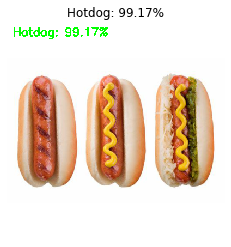

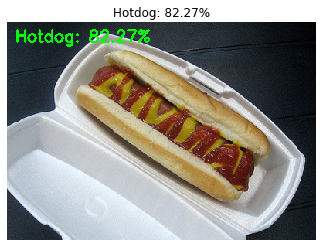

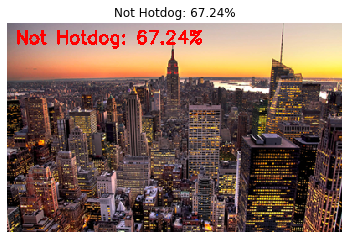

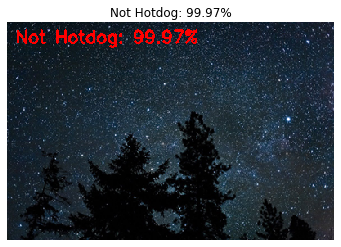

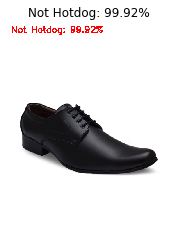

In [4]:
%matplotlib inline
# USAGE
# python test_network.py --model santa_not_santa.model --image images/examples/santa_01.png

# import the necessary packages
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import argparse
import cv2
import glob
import matplotlib.pyplot as plt
import imutils

test_set_path = './examples/*.*'
model_path = model_path
test_imgs = glob.glob(test_set_path)
print(test_imgs)


# load the trained convolutional neural network
print("[INFO] loading network...")
model = load_model(model_path)

for img in test_imgs:
    image = cv2.imread(img)
    orig = image.copy()

    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)


    # classify the input image
    (notHotdog, hotdog) = model.predict(image)[0]

    # build the label
    if hotdog > notHotdog:
        label = "Hotdog"
        proba = hotdog 
        color = (0,255,0)
    else: 
        label = "Not Hotdog"
        proba =  notHotdog
        color = (0,0,255)

    label = "{}: {:.2f}%".format(label, proba * 100)
    # draw the label on the image
    output = imutils.resize(orig, width=400)
    cv2.putText(output, label, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX,
        0.7, color, 2)

    plt.imshow(output[:,:,::-1])
    plt.title(label)
    plt.axis('off')
    plt.show()

### AlexNet
* 2012 이미지넷 대회 우승
* 알렉스 크리체프스키(Alex Krizhevsky)
* 제프리 힌튼 교수 팀
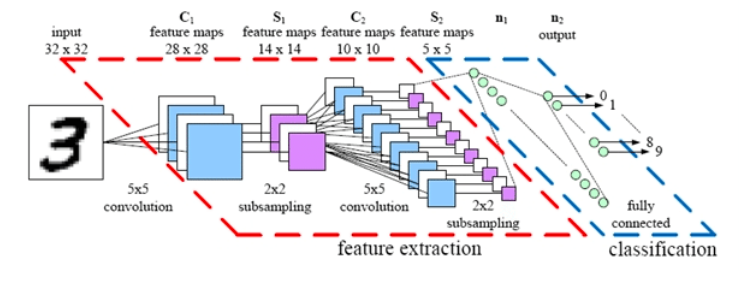

### AlexNet 구성
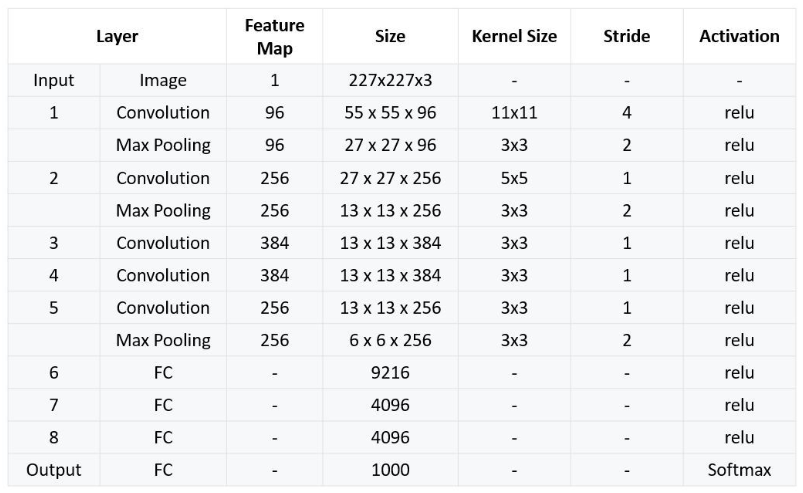

### GoogLeNet
* 구글 리서치, 크리스찬 세게디(Christian Szegedy)
* ILSVRC 2014 대회 우승
    * Top-5 Error 6.7%
* Inception Module
    * 서브 네트워크
    * 더 깊은  CNN
    * 더 효과적인 파라미터 사용
        * 사이즈가 다른 여러 필터를 연결
        * 더 깊지만 전체 파라미터 갯수는 VGG16/VGG19 보다 더 적음
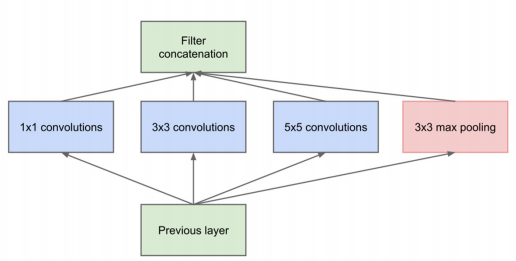
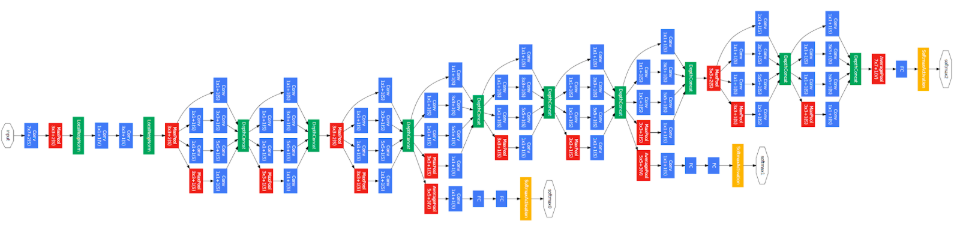

### GoogLeNet 구성
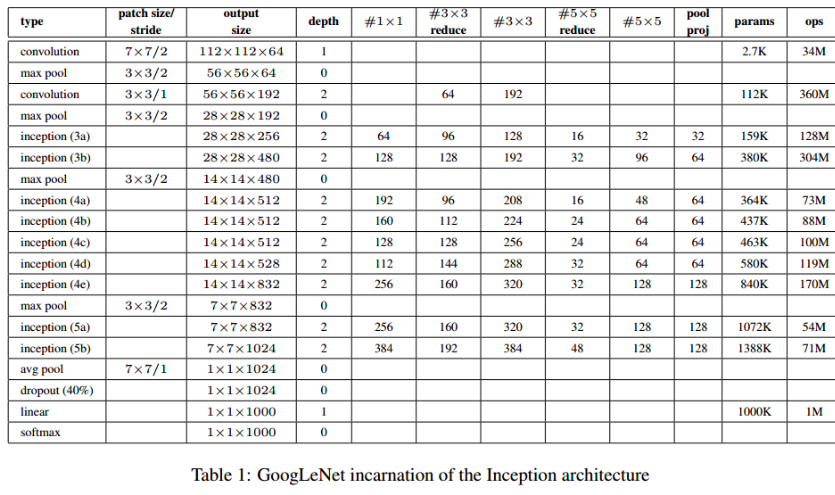

### SqueezeNet
* CNN 모델은 점점 깊어지는 추세
    * 모델의 크기가 커지고 파라미터 갯수가 많아진다.
    * 고성능 컴퓨팅 파워 필요
    * 저성능 컴퓨터에서는 훈련은 물론 예측도 불가능
* Landola(2016)의 논문에 의해 제안
    * AlexNet과 비슷한 정확도
    * 50배 적은 파라미터
    * 0.5mB 이하의 모델 크기를 자랑
    * Raspberry Pi 에서도 사용 가능
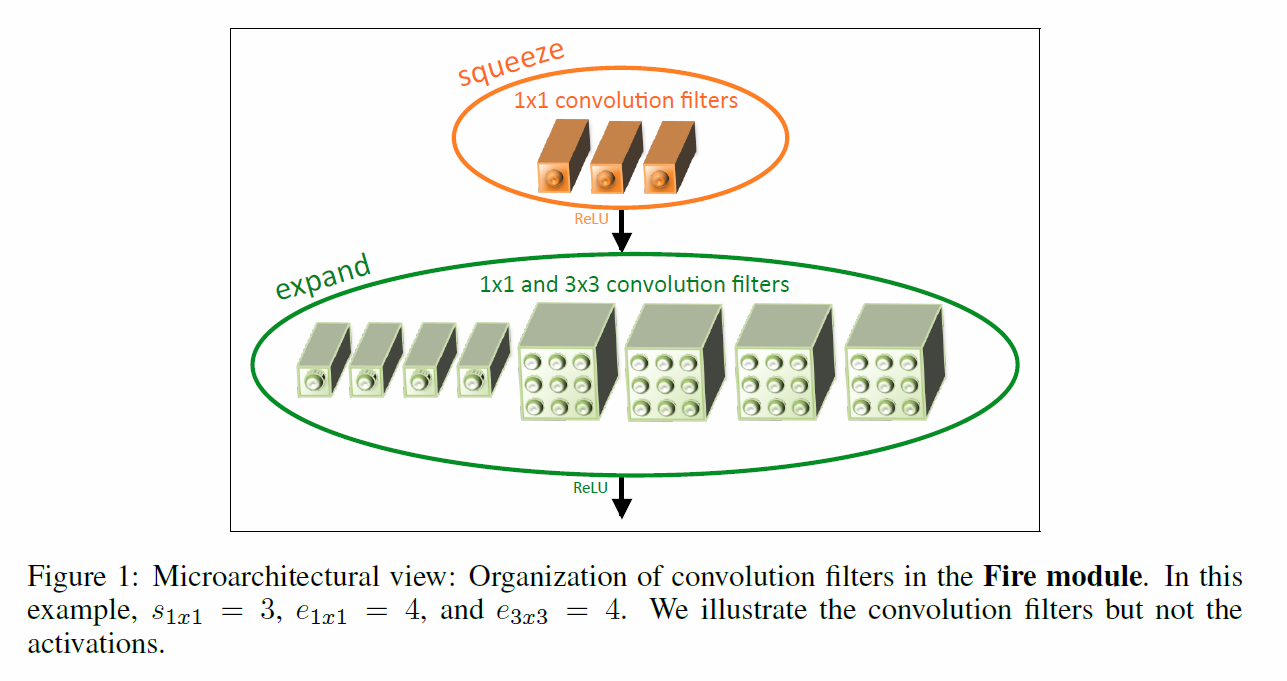

### VGGNet
* Simonyan, Zisserman 2014 "Very Deep Convolution Networks for Large Scale Image Recognition"
    * https://arxiv.org/abs/1409.1556
* 3x3 컨볼루션 레이어만 사용하는 것으로 유명
* VGG16(16Layers), VGG19(19Layers)
* 깊이 때문에 매우 느리다.

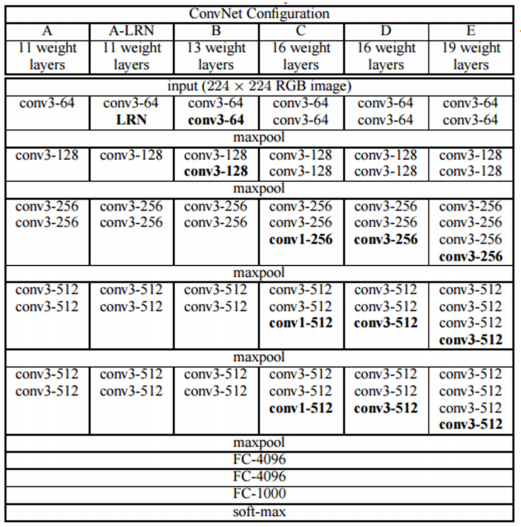

### Inception V3
* GoogLeNet의 Inception V1의 개선
* Inception V2, V3
* 초기 모델에서 개선된 진화
* 효과적인 컨볼루션 필터(7x7 필터)
* 향상된 표준화, 컨볼루션의 factorization


### MobileNet
* 무거운 Convolution Layer을 Fatorization으로 줄이다.
* Depthwise Separable Convlution
    * DepthWise와 PointWise를 분리
    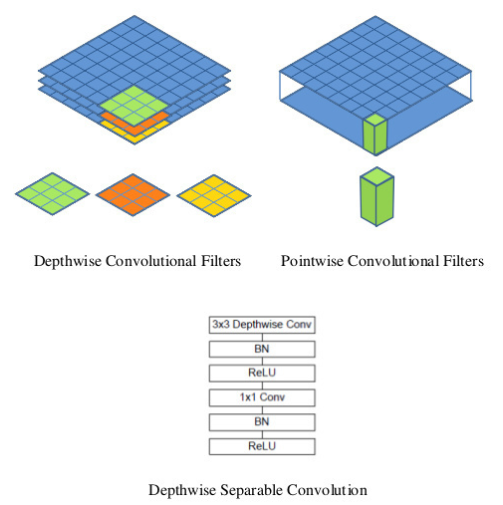
    * 계산량을  8~9배 줄이다.
    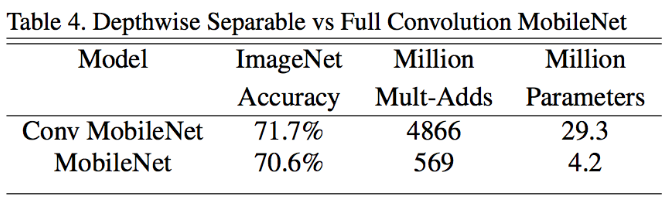

## Keras Image Classification Pre-trained Models on ImageNet 
* Xception
* VGG16
* VGG19
* ResNet, ResNetV2, ResNeXt
* InceptionV3
* InceptionResNetV2
* MobileNet
* MobileNetV2
* DenseNet
* NASNet

### API
* [`keras.applications`](https://keras.io/applications/)
    * download : `~/.keras/model/`

#### ResNet50 Example

Using TensorFlow backend.


40960/35363 [==================================] - 0s 6us/step
Predicted: [('n02504458', 'African_elephant', 0.64891356), ('n02504013', 'Indian_elephant', 0.22936395), ('n01871265', 'tusker', 0.11735518)]


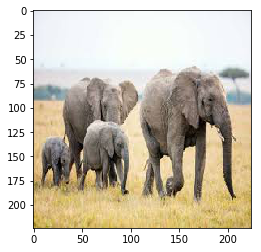

In [1]:
%matplotlib inline

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = ResNet50(weights='imagenet')

img_path = './img/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

plt.imshow(img)

## Object Detection
* Image Classification : 이미지의 객체가 무엇인지 구분
* Object Dection : 이미지의 객체가 무엇이고 어디 있는지 인식
    * Classification + Localization
    
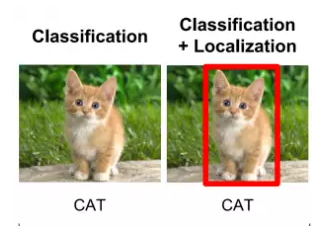

### Sliding Window & Image Prymid
* Sliding Window
![sliding window](https://cv-tricks.com/wp-content/uploads/2017/12/Sliding-window.gif)
    * 고정된 크기의 윈도를 슬라이딩 하면서 image claasification을 수행
* Image Prymid
    * 고정된 크기의 윈도로는 크고 작은 객체를 탐지 할 수 없음
![image prymid](https://cv-tricks.com/wp-content/uploads/2017/12/pyramid-269x300.png)

### Object Detction 기법
* Hog Descriptor
    * 고전적인 방식 
    * Histogram of Orientation Gradients(HOG) 특징 추출
    * SVM(Support Vector Machine)으로 이미지 분류
    * 슬라이딩 윈도우로 객체 인식
* R-CNN
    * Region-Based Convolutional Neural Networks
    * 초기 관심 영역(ROI)를 Selective Search 알고리즘으로 구한다.
    * ROI를 같은 크기로  축소해서 CNN에 모두 넣어서 SVM으로 classification, Bouding box regression을 한다.
    * 상대적으로 느리다.
![R-cnn](https://cv-tricks.com/wp-content/uploads/2017/12/RCNN-e1514378306435.jpg)
* Fast R-CNN 
    * Initial ROI를 축소(warping) 하지 않고 ConvNet에 feature map까지 그대로 적용
    * ROI Pooling, max pooling의 크기를 조정해서 최종 크기를 같게 한다.
	* 상대적으로 빠르다
* Faster R-CNN(RPN + Fast R-CNN)
    * Fast R-CNN의 가장 느린 부분인 Selective Search와 Edge Boxes를 제거
    * 아주 작은 Convlution Network으로 대체(Region Proposal network)
    ![Faster R-cnn](https://cv-tricks.com/wp-content/uploads/2017/12/Faster-RCNN-CV-Tricks-1.jpg)
* YOLO
    * You Only Look Once
    * 입력 이미지로 부터 class probabilities와 bounding box 좌표를 학습하는 회귀 문제
    * 입력 이미지를 S x S 크기 그리드로 나눈다.
    * 각 그리드는 N 바운딩 박스와 신뢰도를 예측
    * SxSxN 개의 바운딩 박스를 예측해서 지정한 신뢰도를 만족하지 않는 것을 제거
    ![yolo](https://cv-tricks.com/wp-content/uploads/2017/12/model2-1024x280.jpg)
    * https://www.ted.com/talks/joseph_redmon_how_a_computer_learns_to_recognize_objects_instantly?language=ko
* SSD
    * Single Shot Detector
    * R-CNN 계열의 Region Proposal Network를 제거
    * Multi-Scale Featre Map 
    * 주요 구성
        * Feature Map Extractor
        * Convolution Filtter
* Mask R-CNN
    * Faster R-CNN + Instance Segmentation
    ![Mask R-CNN](https://github.com/matterport/Mask_RCNN/raw/master/assets/street.png)
    * https://github.com/matterport/Mask_RCNN


### Mask R-CNN 실습
* scikit-image 설치
    * `!pip install scikit-image`
* Mask RCNN 설치
    * `git clone https://github.com/matterport/Mask_RCNN`
    * `cd Mak_RCNN`
    * `python setup.py install`

In [2]:
!pip install scikit-image

    100% |████████████████████████████████| 29.2MB 248kB/s ta 0:00:011
    100% |████████████████████████████████| 5.0MB 950kB/s ta 0:00:011
    100% |████████████████████████████████| 3.9MB 1.5MB/s ta 0:00:011
    100% |████████████████████████████████| 1.7MB 2.0MB/s ta 0:00:011
  Using cached https://files.pythonhosted.org/packages/5f/88/0075e461560a1e750a0dcbf77f1d9de775028c37a19a346a6c565a257399/decorator-4.4.0-py2.py3-none-any.whl
  Found existing installation: decorator 4.1.2
    Uninstalling decorator-4.1.2:
      Successfully uninstalled decorator-4.1.2
  Running setup.py install for networkx ... done
You are using pip version 10.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os

CLASS_NAMES = open('./trained_model/mask_rcnn/coco_labels.txt').read().strip().split("\n")
print('coco data classes:', len(CLASS_NAMES))

hsv = [(i / len(CLASS_NAMES), 1, 1.0) for i in range(len(CLASS_NAMES))]
COLORS = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
random.seed(42)
random.shuffle(COLORS)

class SimpleConfig(Config):
    NAME = "coco_inference"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = len(CLASS_NAMES)

    
config = SimpleConfig()
 
print("[INFO] loading Mask R-CNN model...")
model = modellib.MaskRCNN(mode="inference", config=config, model_dir=os.getcwd())
model.load_weights('./trained_model/mask_rcnn/mask_rcnn_coco.h5', by_name=True)
print("[INFO] Mask R-CNN model loaded.")

Using TensorFlow backend.


coco data classes: 81
[INFO] loading Mask R-CNN model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
[INFO] Mask R-CNN model loaded.


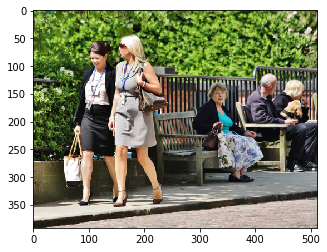

In [38]:
#img_path = './img/mask_rcnn/1045023827_4ec3e8ba5c_z.jpg'
#img_path = './img/mask_rcnn/12283150_12d37e6389_z.jpg'
#img_path = './img/mask_rcnn/7933423348_c30bd9bd4e_z.jpg'
img_path = './img/mask_rcnn/9247489789_132c0d534a_z.jpg'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = imutils.resize(image, width=512)
 
plt.imshow(image)

[INFO] making predictions with Mask R-CNN...
Processing 1 images
image                    shape: (392, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


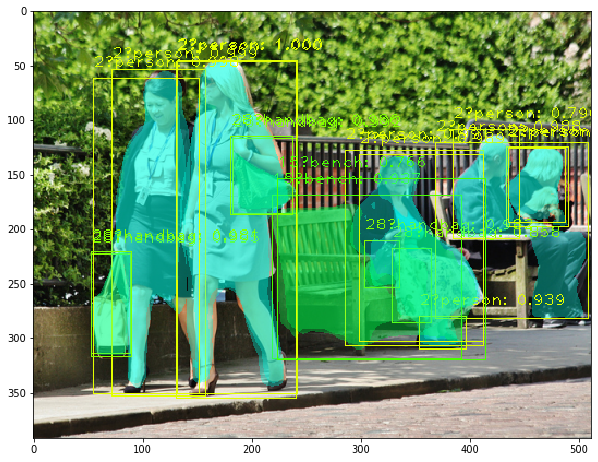

In [40]:
print("[INFO] making predictions with Mask R-CNN...")
r = model.detect([image], verbose=1)[0]

for i in range(0, r["rois"].shape[0]):
    classID = r["class_ids"][i]
    mask = r["masks"][:, :, i]
    color = COLORS[classID][::-1]

    img = visualize.apply_mask(image, mask, color, alpha=0.35)

for i in range(0, len(r["scores"])):
    (startY, startX, endY, endX) = r["rois"][i]
    classID = r["class_ids"][i]
    label = CLASS_NAMES[classID]
    score = r["scores"][i]
    color = [int(c) for c in np.array(COLORS[classID]) * 255]

    cv2.rectangle(img, (startX, startY), (endX, endY), color, 1)
    text = "{}: {:.3f}".format(label, score)
    y = startY - 10 if startY - 10 > 10 else startY + 10
    cv2.putText(img, text, (startX, y), cv2.FONT_HERSHEY_PLAIN, 1, color, 1)

plt.figure(figsize=(10, 8))
plt.imshow(img)

### Mask-RCNN with Video/Camera

In [42]:
import cv2

#cap = cv2.VideoCapture(0)
cap = cv2.VideoCapture('./img/paris.mp4')
while cap.isOpened():
    ret, img = cap.read()
    if ret:
        r = model.detect([img], verbose=1)[0]
        for i in range(0, r["rois"].shape[0]):
            classID = r["class_ids"][i]
            mask = r["masks"][:, :, i]
            color = COLORS[classID][::-1]
            img = visualize.apply_mask(img, mask, color, alpha=0.4)

        for i in range(0, len(r["scores"])):
            (startY, startX, endY, endX) = r["rois"][i]
            classID = r["class_ids"][i]
            label = CLASS_NAMES[classID]
            score = r["scores"][i]
            color = [int(c) for c in np.array(COLORS[classID]) * 255]

            cv2.rectangle(img, (startX, startY), (endX, endY), color, 1)
            text = "{}: {:.3f}".format(label, score)
            y = startY - 10 if startY - 10 > 10 else startY + 10
            cv2.putText(img, text, (startX, y), cv2.FONT_HERSHEY_PLAIN, 1, color, 1)
        cv2.imshow('cam', img)
        if cv2.waitKey(1) == 27:
            cv2.destroyAllWindows()
            break
    else:
        print("camera is not ready")
        break
cap.release()


Processing 1 images
image                    shape: (360, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (360, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Processing 1 images
image                    shape: (360, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.1